# Uber - 2020 strategy for Riyadh Market (Part 3)

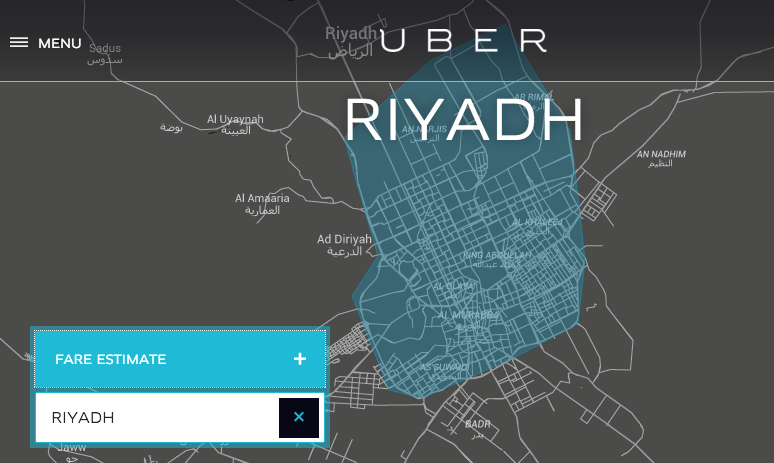

In [16]:
from IPython.display import Image
Image(filename='output1.png',width=1000, height=400)

In [17]:
from IPython.core.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

#### Importing Libraries

The following libraries should be imported to run this notebook:
pandas, sqlite3, numpy, matplotlib, plotly, dash, pivottablejs. </br>

The Plotly Python library is an interactive open-source library. This can be a very helpful tool for data visualization and understanding the data simply and easily. plotly graph objects are a high-level interface to plotly which are easy to use. It can plot various types of graphs and charts like scatter plots, line charts, bar charts, box plots, histograms, pie charts, etc. 

Dash is a Python framework for building analytical web applications. Dash helps in building responsive web dashboards that is good to look at and is very fast without the need to understand complex front-end frameworks or languages such as HTML, CSS, JavaScript.

In [18]:
import pandas as pd
import sqlite3 as sql
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Plotly graphs
from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
# this helps us get the theme settings
import plotly.io as plt_io
import plotly.graph_objs as go
# import cufflinks as cf
# cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)
import plotly.express as px
# import dash_table_experiments as dt
#importing dash
from dash import Dash, dcc, html, Input, Output  # pip install dash (version 2.0.0 or higher)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import dash_table
import warnings
warnings.filterwarnings('ignore')

In [19]:
df_riyadh=pd.read_csv('riyadh_sample.csv')

In [20]:
# Reading the data for the pie chart
# Pie chart displays the % of the trips based on different types of trip status

df_chart1=df_riyadh.groupby(['city_id','trip_status'])['trip_id'].count()
#df_chart1.loc['Grand Total'] = df_chart1.sum()
df_chart1.columns=['city_id','trip_status','Total']
df_chart1 = df_chart1.reset_index()
df_chart1=df_chart1.rename({'city_id':'city_id','trip_status': 'trip_status', 'trip_id': 'Total'}, axis=1)
df_chart1['trip_status']=df_chart1['trip_status'].astype(str)
df_chart1['Total']=df_chart1['Total'].astype(int)

In [21]:
# Calculating and Displaying numerical data of the Riyadh city dataset
Completion_rate=(df_chart1.loc[df_chart1['trip_status'] == 'completed']['Total'])/df_riyadh['trip_id'].count()
Completion_rate=Completion_rate[0]*100
Cancellation_rate=(100-Completion_rate)
Cancellation_rate=str(round(Cancellation_rate,2))+'%'
Total_Fare=df_riyadh['trip_fare_usd'].sum()
Average_Fare=Total_Fare/df_riyadh.loc[df_riyadh['trip_status']=='completed']['trip_id'].count()

Total_Fare='$'+str(round(Total_Fare,2))

Surged_trip_pct=(df_riyadh.loc[df_riyadh['surged_trip'] == True]['surged_trip'].count()/df_riyadh['trip_id'].count())*100
Average_Fare=str(round(Average_Fare,2))+'%'
Surged_trip_pct=str(round(Surged_trip_pct,2))+'%'

In [22]:
df_chart1['Percent_Total']=df_chart1['Total']/df_riyadh['trip_id'].count()*100

In [23]:
df_riyadh['request_local_time'] = pd.to_datetime(df_riyadh['request_local_time'])
Request_time=list(df_riyadh['request_local_time'])
unique=set(Request_time)
unique=list(unique)
unique.sort()
Last_Updated=unique[0]

In [24]:
unique[1]

Timestamp('2018-05-07 01:00:00')

In [25]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

In [26]:
app = Dash(__name__,external_stylesheets = external_stylesheets)

In [27]:
app.layout = html.Div([
    html.Div([
        html.Div([
            html.Img(src=app.get_asset_url('Uber.jpeg'), 
                     id='Uber-logo', 
                     style={
                             'height':'60px',
                             'width':'auto', 
                             'margin-bottom':'25px'
                     })
        ],className="one-third column"),
        
        html.Div([
            html.Div([html.H3("General Statistic For Uber Riyadh",style={'margin-bottom':'3px', 'color':'white', 'textAlign':'center'}),
                    ])
            
        ],className='one-half column', id ='title'),
    html.Div([
        html.Div([html.H6('Last Updated: '+str(unique[0]), style={'color':'Orange'})])
        
        
    ],className='one-third-column', id='title1')
    ], id='header',
        className='row flex-display', 
        style={
                'margin-bottom':'25px'
        }),
    
    html.Div([
        
        html.Div([
            html.H6(children='Cancellation Rate', style={'textAlign':'center','color':'black'}), 
                   html.P(Cancellation_rate,style={'textAlign':'center','color':'Grey','fontSize':40})
        ], className='card_container three columns'),
        
        html.Div([
            html.H6(children='Total Fare', style={'textAlign':'center','color':'black'}), 
                   html.P(Total_Fare,style={'textAlign':'center','color':'Grey','fontSize':40})
        ], className='card_container three columns'),
        
        html.Div([
            html.H6(children='Average Fare', style={'textAlign':'center','color':'black'}), 
                   html.P(Average_Fare,style={'textAlign':'center','color':'Grey','fontSize':40})
        ], className='card_container three columns'),
        
        html.Div([
            html.H6(children='Surged Trip Percentage', style={'textAlign':'center','color':'black'}), 
                   html.P(Surged_trip_pct,style={'textAlign':'center','color':'Grey','fontSize':40})
        ], className='card_container three columns'),
        
        
    ],className='row flex display'),
    
    html.Div([html.Div([
        html.P('Select Country:',className='fix_label',style={'color':'white'}),
        dcc.Dropdown(id='w_countries',
                     multi=False,
                     searchable=True, 
                     value='',
                     placeholder='Select Countries',
                     options=[{'label':c,'value':c} for c in df_riyadh['city_id'].unique()], className='dcc_compon'),
#         dcc.Graph(id='cancellation',config={'displayModeBar':False}, className='dcc_compon'),
#         html.P('Updated date'+' '+ str(unique[0]),className='fix_label',style={'text-align':'center','color':'white'})
    ],className='create_container four columns'),
              html.Div([dcc.Graph(id='pie_chart',config={'displayModeBar':'hover'})],className='create_container four columns', style={'maxWidth':'400px'}),
              html.Div([dcc.Graph(id='line_chart',config={'displayModeBar':'hover'})], className='create_container fice column')
             ], className='row flex-display')

    ], id='mainContainer', 
        style={
                'display':'flex',
                'flex-direction':'column'
            })

In [28]:
@app.callback(Output('pie_chart','figure'), [Input('w_countries','value')])
def update_pie_graph(w_countries):
    

    df_chart1=df_riyadh.groupby(['city_id','trip_status'])['trip_id'].count().reset_index()
    #df_chart1.loc['Grand Total'] = df_chart1.sum()
    df_chart1.columns=['city_id','trip_status','Total']
    df_chart1['trip_status']=df_chart1['trip_status'].astype(str)
    df_chart1['Total']=df_chart1['Total'].astype(int)
    df_chart1['Percent_Total']=df_chart1['Total']/df_riyadh['trip_id'].count()*100

    pct_total=list(df_chart1.loc[df_chart1['city_id'] == w_countries, 'Percent_Total'])
    names=list(df_chart1.loc[df_chart1['city_id'] == w_countries, 'trip_status'])
    
#     fig = px.pie(values=pct_total, names=names)
#     return fig
    return {
        'data':[go.Pie(
            labels=names,
            values=pct_total,
            hoverinfo='label+value',
            #textinfo='label+value'
            
        )],
        
        'layout':go.Layout(
                title={'text':'% Type of Trips: '+str(w_countries),
                      'y':1,
                  'x':0.5,
                  'xanchor':'center',
                'yanchor':'top'},
            
            paper_bgcolor='white',
            plot_bgcolor='white'
                      
        )
        
    }

# # pct_total=list(df_chart1['Percent_Total'])
# names=list(df_chart1['trip_status'])
# fig = px.pie(values=pct_total, names=names)
# fig.show()

In [29]:
# Line and bars chart
@app.callback(Output(component_id = "line_chart",component_property = "figure"),
Input(component_id = "w_countries",component_property = "value")
)

# Reading data for the line and bar chart
# This chart gives information about the number of Total trips and the % of Surged trips based on hours
def update_line_chart(w_countries):
    df_riyadh['request_local_time'] = pd.to_datetime(df_riyadh['request_local_time'])
    df_riyadh['Hour_of_day']=df_riyadh['request_local_time'].dt.hour
    df_riyadh_t=df_riyadh.groupby(['city_id','Hour_of_day'])['trip_id'].count().reset_index()
    df_riyadh_x=df_riyadh_t.loc[df_riyadh_t['city_id']==w_countries]
    df_riyadh_x.columns=['city_id','Hour_of_day','Total_trip']
    df_riyadh_y=df_riyadh.loc[df_riyadh['surged_trip'] == True].groupby(['city_id','Hour_of_day'])['surged_trip'].count().reset_index()
    df_riyadh_y.columns=['city_id','Hour_of_day','Total_surged_trip'] 
    df_riyadh_result=pd.merge(df_riyadh_x, df_riyadh_y, on='Hour_of_day', how='outer')
    df_riyadh_result['surged_pct']=(df_riyadh_result['Total_surged_trip']/df_riyadh_result['Total_trip'])*100
    df_riyadh_result['Total_trip_pct']=(df_riyadh_result['Total_trip']/df_riyadh['trip_id'].count())*100  
    
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(go.Bar(x=df_riyadh_result['Hour_of_day'], y=df_riyadh_result['Total_trip'],
                         name='Total_trip',
                         marker_color = 'blue',
                         opacity=0.4,
                         marker_line_color='rgb(8,48,107)',
                        marker_line_width=2),
                  secondary_y=False)



    fig.add_trace(
        go.Scatter(x=df_riyadh_result['Hour_of_day'], y=df_riyadh_result['surged_pct'], name="Surged Percentage"),
        secondary_y=True,
    )

    # Add figure title
    fig.update_layout(
        title_text="Total Trips vs Surged pct"
    )

    # Set x-axis title
    fig.update_xaxes(title_text="Hours")

    # Set y-axes titles
    fig.update_yaxes(title_text=" Total Trips", secondary_y=False)
    fig.update_yaxes(title_text=" Surged Percentage", secondary_y=True)
    fig['layout']['xaxis_nticks']=24
    
    
    return fig


In [ ]:
if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [19/Oct/2021 00:47:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 00:47:36] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 00:47:36] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 00:47:36] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 00:47:36] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 00:47:36] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 00:47:36] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 00:47:37] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 00:47:40] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 00:47:40] "POST /_dash-update-component HTTP/1.1" 200 -
